In [3]:
## **1. Getting Best Accuracy:**

In [325]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [326]:
#Loading the data
data0 = pd.read_csv('urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,correios.com.br,0,0,1,4,0,0,0,0,0,0,1,1,0,0,1,0,0
1,caixa.gov.br,0,0,1,6,0,0,0,0,0,0,1,1,0,0,1,0,0
2,olx.ua,0,0,1,4,0,0,0,0,0,0,1,1,0,0,1,1,0
3,emgn.com,0,0,1,2,0,0,0,0,0,1,0,1,1,1,1,1,0
4,metro.co.uk,0,0,1,4,0,0,0,0,0,0,0,1,0,0,1,0,0


In [327]:
#Checking the shape of the dataset
data0.shape

(17305, 18)

In [328]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [329]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17305 entries, 0 to 17304
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         17305 non-null  object
 1   Have_IP        17305 non-null  int64 
 2   Have_At        17305 non-null  int64 
 3   URL_Length     17305 non-null  int64 
 4   URL_Depth      17305 non-null  int64 
 5   Redirection    17305 non-null  int64 
 6   https_Domain   17305 non-null  int64 
 7   TinyURL        17305 non-null  int64 
 8   Prefix/Suffix  17305 non-null  int64 
 9   DNS_Record     17305 non-null  int64 
 10  Web_Traffic    17305 non-null  int64 
 11  Domain_Age     17305 non-null  int64 
 12  Domain_End     17305 non-null  int64 
 13  iFrame         17305 non-null  int64 
 14  Mouse_Over     17305 non-null  int64 
 15  Right_Click    17305 non-null  int64 
 16  Web_Forwards   17305 non-null  int64 
 17  Label          17305 non-null  int64 
dtypes: int64(17), object(1)
me

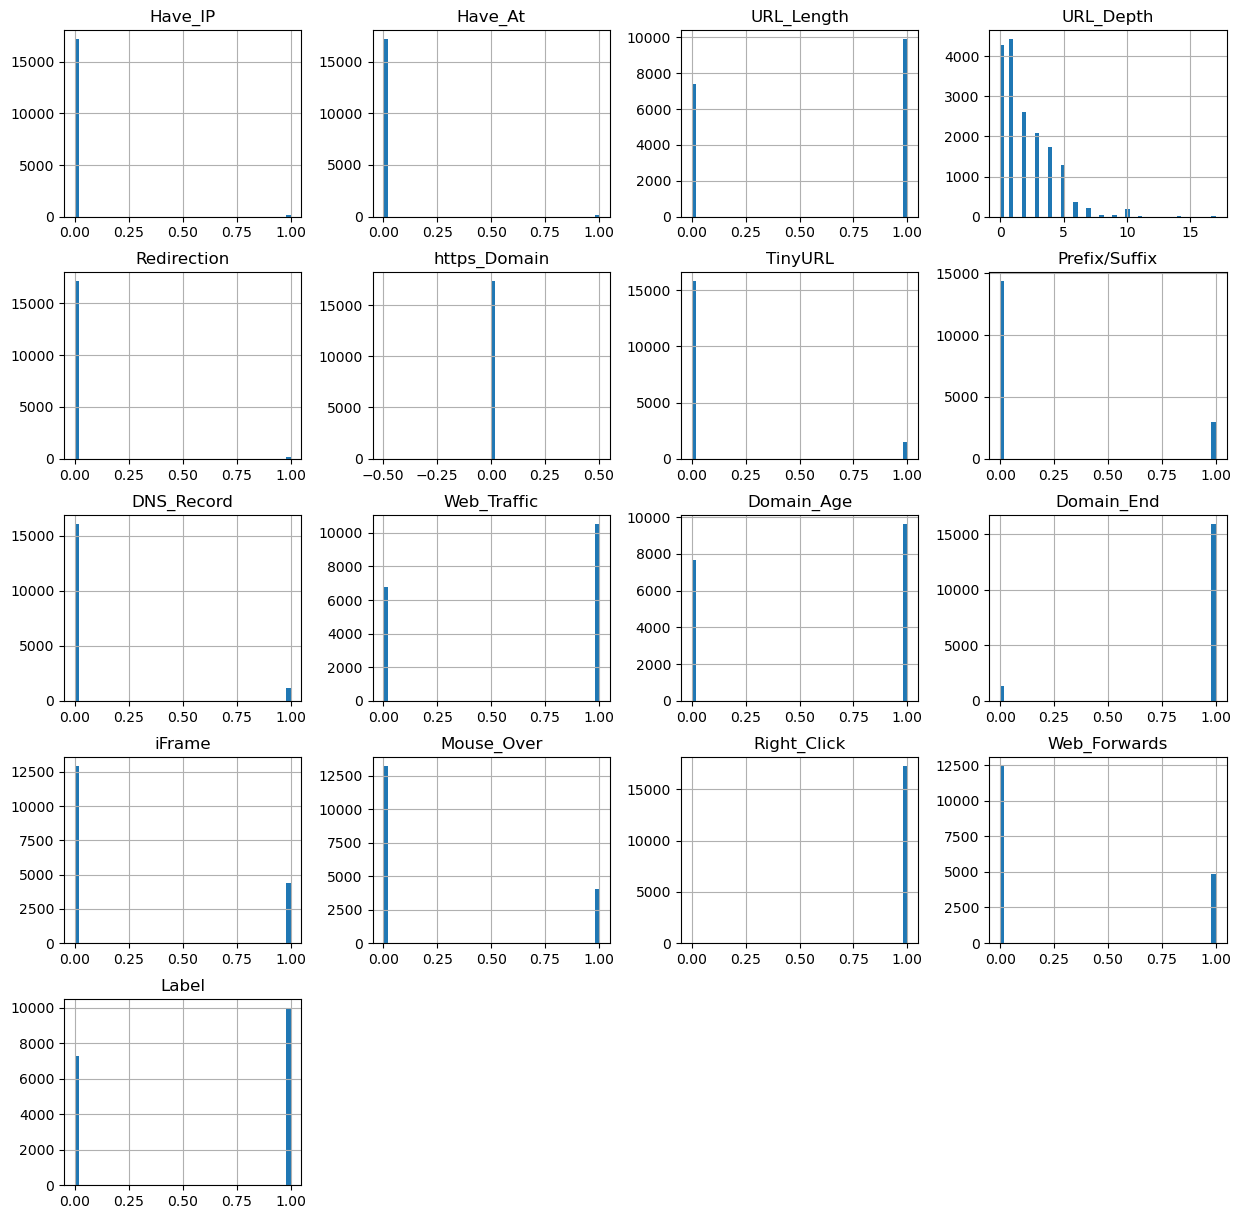

In [330]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [331]:
# print(data0.dtypes)
# Select only numeric columns for correlation
data0_numeric = data0.select_dtypes(include=[np.number])

# If you want to check for any remaining non-numeric columns
if data0_numeric.shape[1] == 0:
    print("No numeric columns available for correlation.")

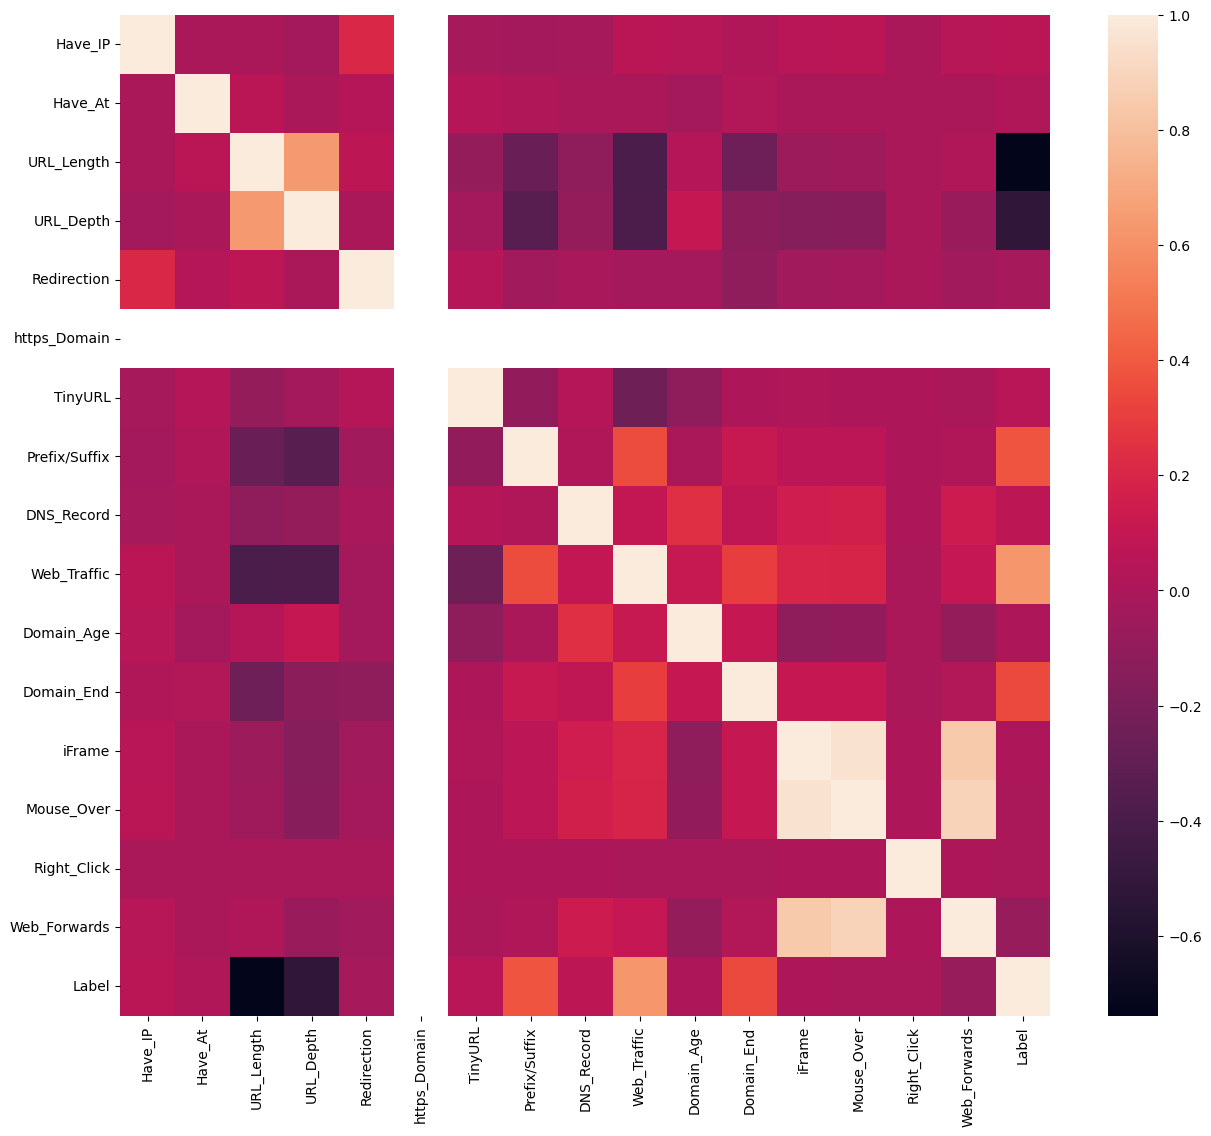

In [332]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0_numeric.corr())
plt.show()

In [107]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.0,12305.000000,12305.000000
mean,0.000488,0.006258,0.702885,2.450711,0.012434,0.000163,0.084518,0.127509,0.434214,0.542381,0.735230,0.892483,0.367412,0.546688,1.0,0.266965,0.406339
std,0.022077,0.078860,0.457006,2.135875,0.110817,0.012748,0.278175,0.333556,0.495673,0.498221,0.441229,0.309782,0.482119,0.497836,0.0,0.442392,0.491169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,0.000000,0.000000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [108]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [18]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [114]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,0
1,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,0,1
2,0,0,1,3,0,0,0,0,0,1,0,1,1,1,1,1,0
3,0,0,1,2,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1


In [115]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((12305, 16), (12305,))

In [116]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((9844, 16), (2461, 16))

In [117]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score


In [118]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [139]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=100)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [135]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [138]:
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.997
XGBoost : Accuracy on test Data: 0.997


In [122]:
scores = cross_val_score(xgb, X_train, y_train, cv=5)
print(f"Mean Accuracy: {scores.mean():.2f}")

Mean Accuracy: 1.00


In [123]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [124]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,XGBoost,0.997,0.997


In [357]:
import pandas as pd
from sklearn.metrics import confusion_matrix,precision_score, f1_score, matthews_corrcoef

# Define your function to calculate metrics
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    tpr = tp / (tp + fn)  # Sensitivity/Recall
    tnr = tn / (tn + fp)  # Specificity
    fpr = fp / (fp + tn)  # Fall-out
    fnr = fn / (fn + tp)  # Miss rate
    precision = tp / (tp + fp)
    recall = tp / (fn + tp)
    f1 = 2 * (precision * tpr) / (precision + tpr)
    mcc = ((tp * tn) - (fp * fn)) / (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5)

    return tpr, tnr, fpr, fnr, precision,recall, f1, mcc

# Example: Dummy values (replace with your actual data)
ML_Model = ['XGBoost']
acc_train = acc_train_xgb  # Replace with your train accuracy
acc_test = acc_test_xgb   # Replace with your test accuracy

# True and predicted labels for your single model
y_true = y_train  # Replace with actual ground truth
y_pred = y_train_xgb  # Replace with model predictions

# Calculate metrics for the single model
tpr, tnr, fpr, fnr, precision,recall, f1, mcc = calculate_metrics(y_true, y_pred)

# Prepare results dataframe
results = pd.DataFrame({
    'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'TPR': [tpr],
    'TNR': [tnr],
    'FPR': [fpr],
    'FNR': [fnr],
    'Precision' : [precision],
    'Recall' : [recall],
    'F1' : [f1],
    'MCC' : [mcc],
})
vertical_results = results.melt(var_name='Name', value_name='Value')

print(vertical_results)

              Name     Value
0         ML Model   XGBoost
1   Train Accuracy  0.992483
2    Test Accuracy   0.99228
3              TPR  0.412466
4              TNR  0.585525
5              FPR  0.414475
6              FNR  0.587534
7        Precision  0.407908
8           Recall  0.412466
9               F1  0.410174
10             MCC -0.002006


In [125]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

In [126]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [163]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Contoh Data
X = data.drop('Label', axis=1)  # Fitur
y = data['Label']  # Label

# Menghitung Information Gain
ig_scores = mutual_info_classif(X, y)

# Membuat DataFrame skor IG
ig_results = pd.DataFrame({
    'Feature': X.columns,
    'Information Gain': ig_scores
}).sort_values(by='Information Gain', ascending=False)

print(ig_results)


          Feature  Information Gain
8      DNS_Record          0.574176
2      URL_Length          0.374868
13     Mouse_Over          0.367289
9     Web_Traffic          0.296712
3       URL_Depth          0.291766
10     Domain_Age          0.168134
7   Prefix/Suffix          0.113667
11     Domain_End          0.063717
12         iFrame          0.042773
15   Web_Forwards          0.010263
6         TinyURL          0.006239
14    Right_Click          0.005323
0         Have_IP          0.003516
5    https_Domain          0.002500
1         Have_At          0.001139
4     Redirection          0.000000


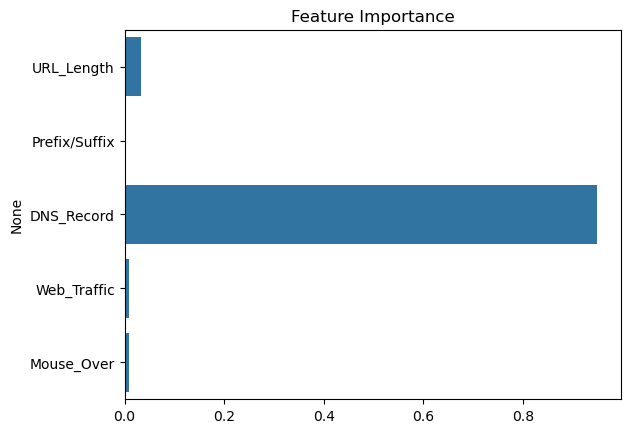

In [192]:
feature_importances = xgb_model.feature_importances_
sns.barplot(x=feature_importances, y=selected_features)
plt.title('Feature Importance')
plt.show()

In [217]:
# Misalkan Anda memilih fitur dengan IG > 0.1
selected_features = ['DNS_Record', 'URL_Length', 'Mouse_Over', 'Web_Traffic', 'URL_Depth']

# Buat subset data
X_selected = X[selected_features]

# Latih ulang model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=12)
#X_train.shape, X_test.shape

# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=100)
#fit the model
xgb.fit(X_train, y_train)

y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on selected featurestraining Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on selected features test Data: {:.3f}".format(acc_test_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_xgb)
TN, FP, FN, TP = cm.ravel()

# Calculate Metrics
TPR = TP / (TP + FN)  # True Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (FN + TP)  # False Negative Rate
precision = precision_score(y_test, y_test_xgb)
f1 = f1_score(y_test, y_test_xgb)
mcc = matthews_corrcoef(y_test, y_test_xgb)

print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


XGBoost: Accuracy on selected featurestraining Data: 0.992
XGBoost : Accuracy on selected features test Data: 0.992
True Positive Rate (TPR): 1.0000
True Negative Rate (TNR): 0.9870
False Positive Rate (FPR): 0.0130
False Negative Rate (FNR): 0.0000
Precision: 0.9813
F1-Score: 0.9906
Matthews Correlation Coefficient (MCC): 0.9842


In [177]:
from sklearn.feature_selection import f_classif

# Contoh dataset phishing
# data = {
#     'URL_Length': [54, 78, 99, 62, 45, 80, 100, 50, 72, 58],
#     'Domain_Age': [6, 0, 12, 8, 10, 0, 14, 6, 4, 7],
#     'Web_Traffic': [1000, 500, 2000, 800, 1500, 300, 2500, 1200, 700, 900],
#     'Target': [1, 0, 1, 0, 1, 0, 1, 1, 0, 0]  # 1: phishing, 0: bukan phishing
# }

#df = pd.DataFrame(data)
X = data.drop('Label', axis=1)  # Fitur
y = data['Label']  # Target (label)

# Menghitung skor ANOVA
f_scores, p_values = f_classif(X, y)

anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_scores,
    'p-value': p_values
}).sort_values(by='F-Score', ascending=False)

print("\nANOVA Results:")
print(anova_results)

# Pilih fitur dengan p-value < 0.05
selected_features = anova_results[anova_results['p-value'] < 0.05]['Feature']
print("\nSelected Features Based on ANOVA:")
print(selected_features.tolist())



ANOVA Results:
          Feature        F-Score        p-value
8      DNS_Record  101470.385240   0.000000e+00
2      URL_Length   19868.109487   0.000000e+00
13     Mouse_Over   16146.767159   0.000000e+00
9     Web_Traffic   11786.490464   0.000000e+00
10     Domain_Age    4024.549616   0.000000e+00
3       URL_Depth    3996.514430   0.000000e+00
7   Prefix/Suffix    2982.756154   0.000000e+00
12         iFrame    1192.029542  2.098676e-249
11     Domain_End    1105.637718  3.122604e-232
15   Web_Forwards     301.997696   7.581059e-67
6         TinyURL      48.559451   3.367680e-12
0         Have_IP       4.109484   4.266489e-02
4     Redirection       3.423421   6.430164e-02
5    https_Domain       2.922694   8.736714e-02
1         Have_At       2.440707   1.182486e-01
14    Right_Click            NaN            NaN

Selected Features Based on ANOVA:
['DNS_Record', 'URL_Length', 'Mouse_Over', 'Web_Traffic', 'Domain_Age', 'URL_Depth', 'Prefix/Suffix', 'iFrame', 'Domain_End', 'Web_Fo

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [223]:
selected_features = ['DNS_Record', 'URL_Length', 'Mouse_Over', 'Web_Traffic', 'Domain_Age', 'URL_Depth', 'Prefix/Suffix', 'iFrame', 'Domain_End', 'Web_Forwards', 'TinyURL', 'Have_IP']

# Gunakan fitur terpilih
X_selected = X[selected_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=12)

# Latih model XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Menghindari peringatan untuk evaluasi metrik
xgb_model.fit(X_train, y_train)

# Prediksi
y_pred = xgb_model.predict(X_test)
y_train = xgb_model.predict(X_train)

# Evaluasi kinerja model
print("\nAccuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nAccuracy on Train Data:", accuracy_score(y_train, y_train))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Perhitungan metrik
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
TNR = TN / (TN + FP)  # True Negative Rate
FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (FN + TP)  # False Negative Rate
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Menampilkan metrik tambahan
print(f"\nTrue Positive Rate (TPR): {TPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Accuracy on Test Data: 0.9971556277935798

Accuracy on Train Data: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1465
           1       1.00      0.99      1.00       996

    accuracy                           1.00      2461
   macro avg       1.00      1.00      1.00      2461
weighted avg       1.00      1.00      1.00      2461


True Positive Rate (TPR): 0.9930
True Negative Rate (TNR): 1.0000
False Positive Rate (FPR): 0.0000
False Negative Rate (FNR): 0.0070
Precision: 1.0000
F1-Score: 0.9965
Matthews Correlation Coefficient (MCC): 0.9941


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:23:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [226]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report

X = data.drop('Label', axis=1)  # Fitur
y = data['Label']  # Target (label)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Inisialisasi model XGBoost
xgb_model = XGBClassifier( eval_metric='logloss')

# Recursive Feature Elimination
rfe = RFE(estimator=xgb_model, n_features_to_select=3)  # Memilih 3 fitur terbaik
rfe.fit(X_train, y_train)

# Menampilkan fitur yang dipilih
selected_features = X.columns[rfe.support_]
print("\nSelected Features Based on RFE:")
print(selected_features.tolist())

# Evaluasi model dengan fitur terpilih
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Latih model dengan fitur terpilih
xgb_model.fit(X_train_rfe, y_train)
y_pred = xgb_model.predict(X_test_rfe)

# Evaluasi kinerja model
print("\nAccuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Perhitungan metrik
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
TNR = TN / (TN + FP)  # True Negative Rate
FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (FN + TP)  # False Negative Rate
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Menampilkan metrik tambahan
print(f"\nTrue Positive Rate (TPR): {TPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Selected Features Based on RFE:
['URL_Length', 'DNS_Record', 'Web_Traffic']

Accuracy on Test Data: 0.9914668833807395

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1465
           1       0.98      1.00      0.99       996

    accuracy                           0.99      2461
   macro avg       0.99      0.99      0.99      2461
weighted avg       0.99      0.99      0.99      2461


True Positive Rate (TPR): 1.0000
True Negative Rate (TNR): 0.9857
False Positive Rate (FPR): 0.0143
False Negative Rate (FNR): 0.0000
Precision: 0.9794
F1-Score: 0.9896
Matthews Correlation Coefficient (MCC): 0.9825


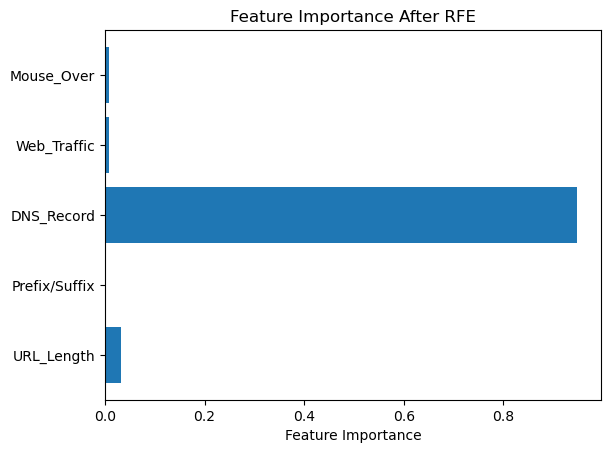

In [191]:
import matplotlib.pyplot as plt

# Fitur penting dari model XGBoost setelah RFE
importances = xgb_model.feature_importances_
plt.barh(selected_features, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance After RFE')
plt.show()

In [159]:
pip install lime shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 240.3 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.3/455.3 kB 331.4 kB/s eta 0:00:00a 0:00:01
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=8653fb1b5c780497ca380ff77c1ca314f61cfbd022c570d7122bb1cc33351d30
  Stored in directory: /Users/reggi/Library/Caches/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


In [205]:
import lime
from lime.lime_tabular import LimeTabularExplainer

X = data.drop('Label', axis=1)  # Fitur
y = data['Label']  # Target (label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Model XGBoost
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Prediksi dan Evaluasi
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Inisialisasi LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, 
                                 training_labels=y_train.values,
                                 feature_names=X.columns.tolist(), 
                                 class_names=['Not Phishing', 'Phishing'], 
                                 mode='classification')

# Pilih sampel data untuk dijelaskan
sample_index = 0
sample = X_test.iloc[sample_index].values.reshape(1, -1)

# Jelaskan prediksi untuk sampel tersebut
exp = explainer.explain_instance(sample.flatten(), model.predict_proba)
exp.show_in_notebook(show_table=True)

Accuracy: 0.9971556277935798


Accuracy: 0.9971556277935798


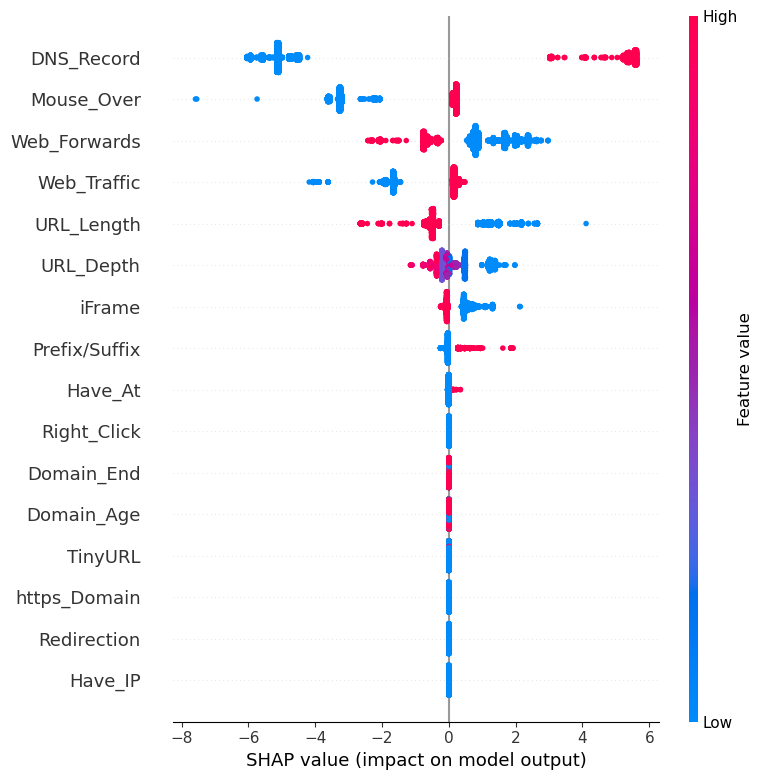

In [206]:
import shap
shap.initjs()
X = data.drop('Label', axis=1)  # Fitur
y = data['Label']  # Target (label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Model XGBoost
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Prediksi dan Evaluasi
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Inisialisasi explainer SHAP
explainer = shap.TreeExplainer(model)

# SHAP values untuk sampel dari X_test
shap_values = explainer.shap_values(X_test)

# Plot global interpretasi
shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist())

# Plot lokal untuk satu sampel
shap.force_plot(explainer.expected_value, shap_values[sample_index, :], X_test.iloc[sample_index, :])

In [232]:
X = data.drop('Label', axis=1)  # Fitur
y = data['Label']  # Target (label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Menggunakan semua fitur dalam contoh ini karena kita fokus pada voting
X_info_gain = X_train  # Asumsikan hasil seleksi sama


In [238]:
from sklearn.feature_selection import SelectKBest, f_classif

# ANOVA: Memilih 6 fitur terbaik
anova_selector = SelectKBest(score_func=f_classif, k=6)
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [239]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination (RFE): Memilih 6 fitur terbaik
xgb_model_rfe = XGBClassifier( eval_metric='logloss')
rfe_selector = RFE(estimator=xgb_model_rfe, n_features_to_select=6)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)


In [240]:
# Model Information Gain
model_info_gain = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_info_gain.fit(X_info_gain, y_train)
y_pred_info_gain = model_info_gain.predict(X_test)

# Model ANOVA
model_anova = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_anova.fit(X_train_anova, y_train)
y_pred_anova = model_anova.predict(X_test_anova)

# Model RFE
model_rfe = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:18:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:18:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [241]:
import numpy as np
from scipy.stats import mode

# Menggabungkan semua prediksi
predictions = np.array([y_pred_info_gain, y_pred_anova, y_pred_rfe])

# Voting Mayoritas
final_predictions, _ = mode(predictions, axis=0)

# Evaluasi Hasil Voting
print("Final Predictions (Maximum Voting):", final_predictions.flatten())
print("Accuracy (Voting):", accuracy_score(y_test, final_predictions.flatten()))


Final Predictions (Maximum Voting): [0 1 0 ... 1 1 0]
Accuracy (Voting): 0.9971556277935798


In [319]:
# Confusion Matrix
cm = confusion_matrix(y_test, final_predictions.flatten())
tn, fp, fn, tp = cm.ravel()

# Calculate Metrics
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
precision = tp / (tp + fp)
f1 = 2 * (precision * tpr) / (precision + tpr)
mcc = ((tp * tn) - (fp * fn)) / (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5)

# Print Metrics
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1: {f1:.4f}")
print(f"MCC: {mcc:.4f}")

True Positive Rate (TPR): 0.9930
True Negative Rate (TNR): 1.0000
False Positive Rate (FPR): 0.0000
False Negative Rate (FNR): 0.0070
Precision: 1.0000
F1: 0.9965
MCC: 0.9941


In [354]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import numpy as np

# Load dataset
data = pd.read_csv('urldata13k.csv')

# Drop irrelevant columns
data = data.drop(['Domain'], axis=1)

# Features and target
X = data.drop('Label', axis=1)  # Features
y = data['Label']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection: ANOVA (SelectKBest)
anova_selector = SelectKBest(score_func=f_classif, k=6)
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

# Feature Selection: RFE (Recursive Feature Elimination)
xgb_model_rfe = XGBClassifier(eval_metric='logloss')
rfe_selector = RFE(estimator=xgb_model_rfe, n_features_to_select=6)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# Model: Information Gain
model_info_gain = XGBClassifier( eval_metric='logloss')
model_info_gain.fit(X_train, y_train)

# Model: ANOVA
model_anova = XGBClassifier( eval_metric='logloss')
model_anova.fit(X_train_anova, y_train)

# Model: RFE
model_rfe = XGBClassifier(eval_metric='logloss')
model_rfe.fit(X_train_rfe, y_train)

# Feature Importance: Using Top 6 Features
model_feature_importance = XGBClassifier(eval_metric='logloss')
model_feature_importance.fit(X_train, y_train)

# Select the 6 most important features
importance_scores = model_feature_importance.feature_importances_
top_features = np.argsort(importance_scores)[-6:]  # Indices of top 6 features
X_train_importance = X_train.iloc[:, top_features]
X_test_importance = X_test.iloc[:, top_features]

# Model: Feature Importance
model_importance = XGBClassifier(eval_metric='logloss')
model_importance.fit(X_train_importance, y_train)

# Voting Classifier (Soft Voting for probabilities)
voting_clf = VotingClassifier(
    estimators=[
        ('info_gain', model_info_gain),
        ('anova', model_anova),
        ('rfe', model_rfe),
        ('importance', model_importance)
    ],
    voting='hard'  # Use 'hard' for majority vote
)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Final predictions
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_voting)
print(f"Accuracy (Voting Classifier): {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_voting)
tn, fp, fn, tp = cm.ravel()

# Calculate additional metrics
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
precision = tp / (tp + fp)
f1 = 2 * (precision * tpr) / (precision + tpr)
mcc = ((tp * tn) - (fp * fn)) / (((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5)

# Print metrics
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1: {f1:.4f}")
print(f"MCC: {mcc:.4f}")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Accuracy (Voting Classifier): 0.9980
True Positive Rate (TPR): 0.9949
True Negative Rate (TNR): 1.0000
False Positive Rate (FPR): 0.0000
False Negative Rate (FNR): 0.0051
Precision: 1.0000
F1: 0.9974
MCC: 0.9958
